In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('CO2_emission.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [82]:
data = df[["Model_Year", "Engine_Size", "Cylinders","Fuel_Consumption_in_City(L/100 km)", "Fuel_Consumption_in_City_Hwy(L/100 km)", "Fuel_Consumption_comb(L/100km)", "CO2_Emissions", "Smog_Level" ]]
label = df[["Make", "Model", "Vehicle_Class", "Transmission" ]]

In [159]:
data_train, data_test, label_train, label_tesst = train_test_split(data, label, test_size = .2)

In [160]:
classifier = GaussianNB()

In [161]:
classifier.fit(data_train, label_train)

GaussianNB()

In [162]:
predicted_label = classifier.predict(data_test)

In [163]:
predictions = classifier.predict(data_train)

In [164]:
classifier.score(data_train,np.array(label_train))

0.26062322946175637

In [141]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [126]:
classifier.fit(data_train, label_train)

KNeighborsClassifier()

In [147]:
knn = KNeighborsClassifier(n_neighbors=3)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(data_train, label_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1)

In [148]:
predicted_label = classifier.predict(data_test)

In [149]:
predictions = classifier.predict(data_train)

In [150]:
classifier.score(data_train,np.array(label_train))

0.09224598930481283

#REGRESI

In [151]:
data, label = datasets.load_diabetes(return_X_y = True)

In [152]:
data = data[:, np.newaxis, 2]

In [153]:
len(data)

442

In [154]:
data_train = data[:-76]
data_test = data[-76:]

label_train = label[:-76]
label_test = label[-76:]

In [155]:
model = linear_model.LinearRegression()

In [156]:
model.fit(data_train, label_train)

LinearRegression()

In [157]:
predicted_label = model.predict(data_test)

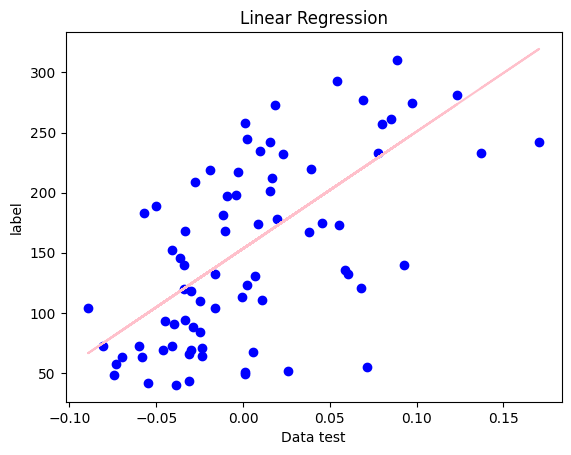

In [158]:
plt.scatter(data_test, label_test, c='blue')
plt.plot(data_test, predicted_label, color = 'pink')
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('label')
plt.show()